In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip')

In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
for tp in df[:3].itertuples(name='Rides'):
  print(f"Индекс {tp.Index}; Число пассажиров: {tp.passenger_count}")

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2


In [ ]:
for index, row in df[:3].iterrows():
    print("Индекс {}; Число пассажиров: {}".format(index, row['passenger_count']))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2


In [ ]:
def haversine(p_long, p_lat, d_long, d_lat, radius=6371):
    p_long, p_lat, d_long, d_lat = map(np.radians, [p_long, p_lat, d_long, d_lat])

    dlon = d_long - p_long 
    dlat = d_lat - p_lat
    a = np.sin(dlat/2)**2 + np.cos(p_lat) * np.cos(d_lat) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    return c * radius

In [ ]:
haversine(-73.844311, 40.721319, -73.841610, 40.712278)

1.030763935049508

In [ ]:
%%time
df['distance'] = pd.Series(haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']) for i, row in df.iterrows())

CPU times: user 4.86 s, sys: 34.2 ms, total: 4.89 s
Wall time: 5.04 s


In [ ]:
%%time
df['distance'] = pd.Series(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude) for row in df.itertuples())

CPU times: user 822 ms, sys: 5.44 ms, total: 828 ms
Wall time: 829 ms


In [ ]:
%%time
df['distance'] = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] \
.apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

CPU times: user 1.33 s, sys: 8.13 ms, total: 1.34 s
Wall time: 1.38 s


In [ ]:
df['distance'].max()

8667.818812217454

In [ ]:
%%time
df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

CPU times: user 12.8 ms, sys: 0 ns, total: 12.8 ms
Wall time: 15 ms


In [ ]:
%%time
df['distance'] = haversine(df['pickup_longitude'].values, df['pickup_latitude'].values, df['dropoff_longitude'].values, df['dropoff_latitude'].values)

CPU times: user 7.76 ms, sys: 909 µs, total: 8.66 ms
Wall time: 12.4 ms


In [ ]:
big_nyc = pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip')

In [ ]:
big_nyc['distance'] = haversine(big_nyc['pickup_longitude'], big_nyc['pickup_latitude'], big_nyc['dropoff_longitude'], big_nyc['dropoff_latitude'])

In [ ]:
big_nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [ ]:
big_nyc.iloc[big_nyc['distance'].idxmax()]

key                  2012-05-12 10:48:00.00000020
fare_amount                                  49.8
pickup_datetime           2012-05-12 10:48:00 UTC
pickup_longitude                       -74.014917
pickup_latitude                         40.713382
dropoff_longitude                             0.0
dropoff_latitude                              0.0
passenger_count                                 1
distance                              8667.818812
Name: 48996, dtype: object

In [ ]:
big_nyc.query("dropoff_latitude == 0 or dropoff_longitude == 0")


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1,0.0
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2,0.0
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5,0.0
...,...,...,...,...,...,...,...,...,...
49625,2012-01-09 19:50:27.0000001,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1,0.0
49816,2012-02-20 00:54:00.000000100,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1,0.0
49845,2009-03-02 21:57:15.0000001,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3,0.0
49856,2010-04-19 17:25:00.000000170,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5,0.0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

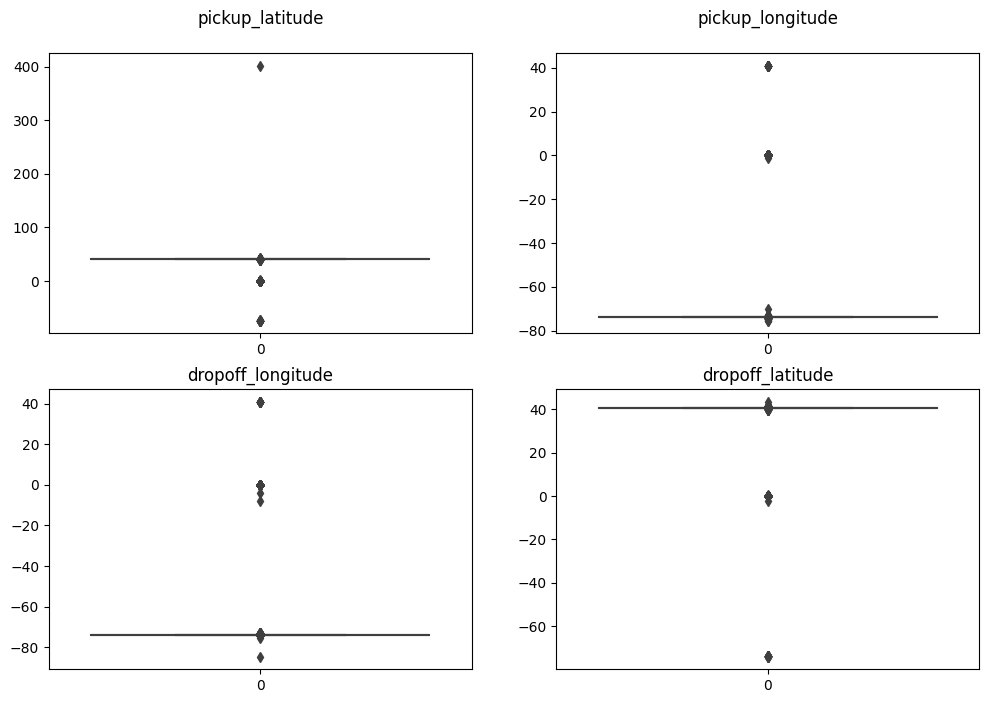

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(big_nyc['pickup_latitude'], ax=axes[0, 0]).set(title='pickup_latitude\n')
sns.boxplot(big_nyc['pickup_longitude'], ax=axes[0, 1]).set(title='pickup_longitude\n')
sns.boxplot(big_nyc['dropoff_longitude'], ax=axes[1, 0]).set(title='dropoff_longitude')
sns.boxplot(big_nyc['dropoff_latitude'], ax=axes[1, 1]).set(title='dropoff_latitude')
plt.tight_layout

In [ ]:
longest_ride = big_nyc.query("(10 < pickup_latitude < 120) & (pickup_longitude < -60) & (10 < dropoff_latitude) & (dropoff_longitude < -60) & (distance <= 50)")['distance'].max()

In [ ]:
big_nyc[big_nyc['distance'] == longest_ride]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.0,2014-02-22 02:44:00 UTC,-73.98954,40.757032,-73.86058,41.147487,1,44.746988


### Shape of data, или работа с таблицами

In [ ]:
np.random.seed(17)
df = pd.DataFrame({'col_1':['item_1', 'item_2', 'item_3', 'item_4', 'item_5'], 
                   'col_2': np.random.randint(0, 10, 5), 
                   'col_3': np.random.randint(0, 10, 5)})
df

,col_1,col_2,col_3
0,item_1,1,6
1,item_2,6,4
2,item_3,6,7
3,item_4,9,4
4,item_5,0,7


In [ ]:
df_stacked = df.stack()
df_stacked

0  col_1    item_1
   col_2         1
   col_3         6
1  col_1    item_2
   col_2         6
   col_3         4
2  col_1    item_3
   col_2         6
   col_3         7
3  col_1    item_4
   col_2         9
   col_3         4
4  col_1    item_5
   col_2         0
   col_3         7
dtype: object

In [ ]:
df_stacked.index.names = ['id', 'column']
df_stacked

id  column
0   col_1     item_1
    col_2          1
    col_3          6
1   col_1     item_2
    col_2          6
    col_3          4
2   col_1     item_3
    col_2          6
    col_3          7
3   col_1     item_4
    col_2          9
    col_3          4
4   col_1     item_5
    col_2          0
    col_3          7
dtype: object

### Теперь задача. В этот раз никаких такси и товаров, потренируемся на характеристиках покемонов! В исходном датасете мультииндексов нет, поэтому будем создавать их сами. Данные сохранены в переменную pokemon.

In [ ]:
pokemon = pd.read_csv('https://stepik.org/media/attachments/lesson/363874/Pokemon.csv')

In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon.columns = pokemon.columns.str.replace(' ', '_').str.replace('.', '').str.lower()

<ipython-input-41-0e1b67ba95c1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pokemon.columns = pokemon.columns.str.replace(' ', '_').str.replace('.', '').str.lower()


In [ ]:
pokemon = pokemon.rename(columns=({'#': 'id'}))

In [ ]:
legends = pokemon.groupby('generation')['legendary'].value_counts().to_frame()

In [ ]:
legends = legends.rename(columns={'legendary': 'legendary_count'})

In [ ]:
legends_unstacked = legends.unstack(level=1)
legends_unstacked

legendary_count      
legendary            False True 
generation                      
1                      160     6
2                      101     5
3                      142    18
4                      108    13
5                      150    15
6                       74     8

In [ ]:
type_1_legendary = pokemon.groupby(['generation', 'type_1'])['legendary'].value_counts().to_frame()

In [ ]:
type_1_legendary.unstack().loc[:,('legendary', True)].idxmax()

(3, 'Dragon')

### Широкий и длинный формат
melt
С помощью метода melt можно "расплавить" данные и привести их к длинному формату. Так, одна или несколько колонок помещаются в качестве идентификационных переменных, а остальные столбцы считаются измеряемыми переменными. Их названия и значения помещаются в колонки variable и value.

In [ ]:
df3 = pd.DataFrame({'name': ['Persik', 'Brownie'], 'type': ['cat', 'dog'],
                    'color': ['ginger', 'white'], 'height': [17, 30], 
                    'weight': [3.4, 4.3]})
df3

,name,type,color,height,weight
0,Persik,cat,ginger,17,3.4
1,Brownie,dog,white,30,4.3


In [ ]:
df3.melt()

,variable,value
0,name,Persik
1,name,Brownie
2,type,cat
3,type,dog
4,color,ginger
5,color,white
6,height,17
7,height,30
8,weight,3.4
9,weight,4.3


In [ ]:
df3.melt(id_vars='name').head()

,name,variable,value
0,Persik,type,cat
1,Brownie,type,dog
2,Persik,color,ginger
3,Brownie,color,white
4,Persik,height,17


In [ ]:
avocado_agg = pd.DataFrame({'type' : ['conventional', 'organic'],
                            'AvgPrice_2015' : [1.077963, 1.673324],
                            'AvgPrice_2016' : [1.105595, 1.571684],
                            'AvgPrice_2017' : [1.294888, 1.735521],
                            'AvgPrice_2018' : [1.127886, 1.567176],
                            })
avocado_agg

,type,AvgPrice_2015,AvgPrice_2016,AvgPrice_2017,AvgPrice_2018
0,conventional,1.077963,1.105595,1.294888,1.127886
1,organic,1.673324,1.571684,1.735521,1.567176


In [ ]:
lng = pd.wide_to_long(avocado_agg, ['AvgPrice'], i=['type'], j='year', sep='_')

In [ ]:
lng

,,AvgPrice
type,year,
conventional,2015,1.077963
organic,2015,1.673324
conventional,2016,1.105595
organic,2016,1.571684
conventional,2017,1.294888
organic,2017,1.735521
conventional,2018,1.127886
organic,2018,1.567176


In [ ]:
super = pd.read_csv('https://stepik.org/media/attachments/lesson/363874/superheroes_power_matrix.csv')

In [ ]:
super.head(3)

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
superheroes_long = super.melt(id_vars='Name', var_name='superpower')

In [ ]:
superheroes_powers = superheroes_long[superheroes_long['value'] == True].groupby('Name')['superpower'].apply(list)
superheroes = superheroes_powers.to_frame().reset_index()

# Управляем временем

In [ ]:
bikes_Q1 = pd.read_csv('https://stepik.org/media/attachments/lesson/367415/bikes_q1_sample.csv')

In [ ]:
bikes_Q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17617135,2018-01-22 20:04:31,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
1,17897619,2018-03-16 19:47:59,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2,17881307,2018-03-14 18:49:20,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
3,17881130,2018-03-14 18:33:48,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
4,17686289,2018-02-05 17:39:14,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


In [ ]:
bikes_Q1['start_time'] = pd.to_datetime(bikes_Q1['start_time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
bikes_Q1 = bikes_Q1.set_index('start_time')

In [ ]:
bikes_Q1.resample(rule='D').count()['trip_id'].max()


4196

In [ ]:
april_bike = pd.read_csv('https://stepik.org/media/attachments/lesson/367415/bikes_april.csv', parse_dates=['start_time', 'end_time'])
april_bike = april_bike.set_index('start_time')

In [ ]:
april_bike.head(2)

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0


In [ ]:
april_bike.groupby('usertype').resample(rule='D').size().loc[:,'2018-04-18']

usertype
Customer        45
Subscriber    2196
Name: 2018-04-18 00:00:00, dtype: int64

In [2]:
urls = ['https://stepik.org/media/attachments/lesson/367415/bikes_q2_sample_apr.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q2_sample_may.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q2_sample_jun.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q3_sample_july.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q3_sample_aug.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q3_sample_sep.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q4_sample_oct.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q4_sample_nov.csv',
        'https://stepik.org/media/attachments/lesson/367415/bikes_q4_sample_dec.csv']

In [8]:
bikes = pd.concat([pd.read_csv(url) for url in urls])

In [9]:
bikes.to_csv()

In [10]:
bikes.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000534,2018-04-01 00:17:00,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
1,18000536,2018-04-01 00:20:00,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2,18000538,2018-04-01 00:23:19,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
3,18000540,2018-04-01 00:24:46,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
4,18000541,2018-04-01 00:26:04,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0


In [11]:
bikes['start_time'] = pd.to_datetime(bikes['start_time'])

In [12]:
bikes_new = bikes.set_index('start_time')

In [13]:
bikes_transp = bikes_new.groupby('usertype').resample(rule='D').size().transpose()

In [14]:
bikes_transp[bikes_transp['Customer'] > bikes_transp['Subscriber']]

usertype,Customer,Subscriber
start_time,,
2018-05-27,3263,2449
2018-09-02,2752,2183


In [15]:
bikes_new.head()

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
2018-04-01 00:24:46,18000540,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
2018-04-01 00:26:04,18000541,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0


In [35]:
bikes_summer = bikes_new.loc['2018-06-01':'2018-08-31']

In [27]:
top_destination = bikes_summer['to_station_name'].value_counts().idxmax()
top_destination

'Streeter Dr & Grand Ave'

In [33]:
bad_day = bikes_summer.query('to_station_name == @top_destination').resample(rule='D').size().idxmin().strftime('%Y-%m-%d')

'2018-06-21'

In [36]:
bikes_summer.head(2)

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN


In [48]:
bikes_summer = bikes_summer.assign(weekday = lambda x: pd.to_datetime(x.index).strftime('%A'))
bikes_summer.head()

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,days,weekday
start_time,,,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0,2018-06-01 00:04:40,Friday
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN,2018-06-01 00:06:08,Friday
2018-06-01 00:08:01,18709086,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0,2018-06-01 00:08:01,Friday
2018-06-01 00:09:02,18709091,2018-06-01 00:19:21,6089,619.0,210,Ashland Ave & Division St,56,Desplaines St & Kinzie St,Subscriber,Male,1987.0,2018-06-01 00:09:02,Friday
2018-06-01 00:09:28,18709092,2018-06-01 00:14:44,2352,316.0,240,Sheridan Rd & Irving Park Rd,303,Broadway & Cornelia Ave,Subscriber,Male,1997.0,2018-06-01 00:09:28,Friday


In [61]:
bikes_summer.groupby(['to_station_name', 'weekday']).size().sort_values(ascending=False).groupby('weekday').head()

to_station_name               weekday  
Streeter Dr & Grand Ave       Saturday     3461
                              Sunday       2565
                              Friday       1726
Lake Shore Dr & North Blvd    Saturday     1690
Streeter Dr & Grand Ave       Wednesday    1669
                              Monday       1503
                              Thursday     1482
Theater on the Lake           Saturday     1470
Lake Shore Dr & North Blvd    Sunday       1402
Theater on the Lake           Sunday       1388
Canal St & Adams St           Monday       1276
                              Wednesday    1270
                              Tuesday      1257
Streeter Dr & Grand Ave       Tuesday      1234
Lake Shore Dr & Monroe St     Saturday     1232
Canal St & Adams St           Thursday     1214
                              Friday       1125
Lake Shore Dr & North Blvd    Wednesday    1119
Millennium Park               Saturday     1080
Lake Shore Dr & Monroe St     Sunday       1039


In [66]:
bikes_summer['wd'] = pd.to_datetime(bikes_summer.index)

AttributeError: ignored

In [67]:
bikes_summer['wd'] = bikes_summer['wd'].dt.day_name()

### стuль
Помимо методов для работы с данными, pandas включает в себя возможности для форматирования таблиц!



In [68]:
np.random.seed(77)
df = pd.DataFrame({'A': list(range(5)), 
                   'B': np.random.randint(0, 10, 5),
                   'C': np.random.randint(-10, 10, 5), 
                   'D': np.random.randint(-10, 100, 5)})
df

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [72]:
df.style.hide(axis='index')

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


In [74]:
df.style.hide(axis='index').set_caption('Cool table')

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


In [80]:
df.style.highlight_max(axis='columns')  

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [81]:
df.style.highlight_min()

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [82]:
(df.style
 .highlight_min('A', color='red')
 .highlight_max('B', color='orange')
 .background_gradient(subset=['C','D'],cmap='viridis')
)

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [83]:
# генерируем данные
df = pd.DataFrame({'A': np.linspace(1, 10, 5)})
df = pd.concat([df, pd.DataFrame(np.random.randn(5, 4), columns=list('BCDE'))],axis=1)
df['F'] = np.random.choice(['A', 'B'], size=5)
df.iloc[3, 3] = np.nan 
df.iloc[0, 2] = np.nan 
df

,A,B,C,D,E,F
0,1.00,0.797939,NaN,-1.652119,0.717119,B
1,3.25,0.977228,-1.040849,-0.643520,-0.112520,A
2,5.50,-0.314166,1.627440,-0.361227,-0.173046,B
3,7.75,-1.951309,-0.978210,NaN,-1.178379,A
4,10.00,-0.515551,-0.063015,-0.559371,0.796697,A


In [84]:
df.style.format("{:+.2f}", subset=df.columns.drop('F'))

,A,B,C,D,E,F
0,+1.00,+0.80,+nan,-1.65,+0.72,B
1,+3.25,+0.98,-1.04,-0.64,-0.11,A
2,+5.50,-0.31,+1.63,-0.36,-0.17,B
3,+7.75,-1.95,-0.98,+nan,-1.18,A
4,+10.00,-0.52,-0.06,-0.56,+0.80,A


In [86]:
(df.style
 .format({'B': "{:0<4.0f}", 'D': '{:+.2f}'})
 .hide(axis='index')
 .set_caption('Новая таблица'))

A,B,C,D,E,F
1.000000,1000,nan,-1.65,0.717119,B
3.250000,1000,-1.040849,-0.64,-0.112520,A
5.500000,-000,1.627440,-0.36,-0.173046,B
7.750000,-200,-0.978210,+nan,-1.178379,A
10.000000,-100,-0.063015,-0.56,0.796697,A
